<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#unfreeze,-with-pooler,-limit-30000" data-toc-modified-id="unfreeze,-with-pooler,-limit-30000-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>unfreeze, with pooler, limit 30000</a></span></li><li><span><a href="#unfreeze,-without-pooler,-limit-30000" data-toc-modified-id="unfreeze,-without-pooler,-limit-30000-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>unfreeze, without pooler, limit 30000</a></span></li></ul></div>

In [ ]:
%run ./multitask_style_learning_utils.ipynb

# unfreeze, with pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/18760 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_PASTEL_country,train_loss_SARC,train_loss_ShortHumor,train_loss_ShortJokeKaggle,train_acc,train_acc_PASTEL_country,train_acc_SARC,train_acc_ShortHumor,...,val_loss,val_loss_PASTEL_country,val_loss_SARC,val_loss_ShortHumor,val_loss_ShortJokeKaggle,val_acc,val_acc_PASTEL_country,val_acc_SARC,val_acc_ShortHumor,val_acc_ShortJokeKaggle
0,0.0,0.744227,0.084527,0.519993,0.069775,0.069932,0.922283,0.979000,0.745867,0.982000,...,0.962915,0.102099,0.595392,0.135535,0.129888,0.813668,0.976403,0.679367,0.947554,0.950826
1,1.0,0.420257,0.065383,0.322383,0.014191,0.018300,0.961750,0.986467,0.869633,0.995867,...,1.072451,0.113893,0.666157,0.149895,0.142506,0.814299,0.973272,0.679933,0.952093,0.951892
2,2.0,0.169656,0.017003,0.144920,0.003140,0.004594,0.987433,0.995600,0.956267,0.999067,...,1.269817,0.125721,0.780792,0.182143,0.181161,0.813378,0.973754,0.675400,0.957640,0.954957
3,3.0,0.063277,0.004832,0.055372,0.001807,0.001266,0.995308,0.998433,0.983367,0.999633,...,1.714471,0.172716,1.122024,0.211922,0.207809,0.809593,0.972068,0.668567,0.954110,0.954824
4,4.0,0.025814,0.001505,0.023412,0.000425,0.000472,0.998200,0.999833,0.993033,0.999967,...,1.897797,0.192570,1.289547,0.201092,0.214588,0.815390,0.973032,0.678400,0.958144,0.956290


Iteration:   0%|          | 0/1834 [00:00<?, ?it/s]

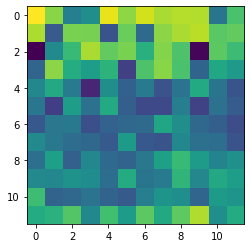

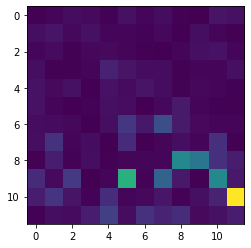

In [ ]:
selected_tasks = ['PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
                  'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=True,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


# unfreeze, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/18760 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/3752 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_PASTEL_country,train_loss_SARC,train_loss_ShortHumor,train_loss_ShortJokeKaggle,train_acc,train_acc_PASTEL_country,train_acc_SARC,train_acc_ShortHumor,...,val_loss,val_loss_PASTEL_country,val_loss_SARC,val_loss_ShortHumor,val_loss_ShortJokeKaggle,val_acc,val_acc_PASTEL_country,val_acc_SARC,val_acc_ShortHumor,val_acc_ShortJokeKaggle
0,0.0,0.722060,0.081134,0.498136,0.044343,0.098447,0.923517,0.979000,0.765833,0.987667,...,1.017275,0.106077,0.594613,0.128326,0.188259,0.806455,0.976403,0.681533,0.953606,0.928616
1,1.0,0.335099,0.037479,0.275145,0.008754,0.013720,0.968392,0.988067,0.892500,0.997433,...,1.122119,0.105964,0.693255,0.161483,0.161417,0.812270,0.976884,0.676067,0.955119,0.950826
2,2.0,0.166456,0.011500,0.147436,0.002300,0.005219,0.985525,0.996333,0.947633,0.999567,...,1.442424,0.148104,0.951466,0.155736,0.187118,0.802568,0.976162,0.656233,0.963691,0.951359
3,3.0,0.045390,0.002727,0.041067,0.000617,0.000979,0.996275,0.999467,0.986067,0.999933,...,1.836656,0.165177,1.309917,0.161997,0.199566,0.812747,0.975921,0.672433,0.968734,0.955890
4,4.0,0.017194,0.001465,0.014973,0.000382,0.000373,0.998717,0.999700,0.995200,0.999967,...,1.951732,0.180669,1.371566,0.177843,0.221655,0.813549,0.975439,0.674733,0.965708,0.955268


Iteration:   0%|          | 0/1834 [00:00<?, ?it/s]

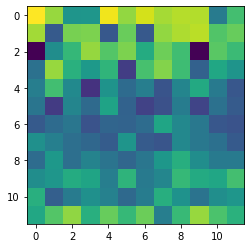

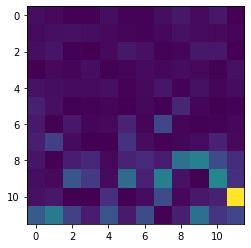

In [ ]:
selected_tasks = ['PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
                  'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)
